Class: AIT 526 October 24, 2021

Professor: Dr. Duoduo (Lindi) Liao

Team 5:
- Anh "Tim" Hien Bach
- Robert "Robb" Jay Dunlap
- Vishnu Lasya Marthala
- David Earl Swanson

 
<div class="alert alert-block alert-info">
<b>Assignment:</b> "Write a Python program called decision-list.py that implements a decision list classifier to perform word sense disambiguation. This method is described on pages 641-644 of the JM text. You should also read the original paper about this method, which is available on BlackBoard (ACL94_Yarowsky_Decision_List.pdf). Note that even though that paper focuses on accent restoration, the method can be used with many classification problems, including word sense disambiguation."
</div>

<div class="alert alert-block alert-success">
    <b>Our Objective:</b> We will develop a script in Jupyter lab that creates a <b>Decision List</b> using the Previous 2, non-stopwords of the <b>Ambiguous Word</b> "line" and the non-stopword that follows. The entries in the list each have a Yarwosky Log-Likelihood as follows:
</div>

>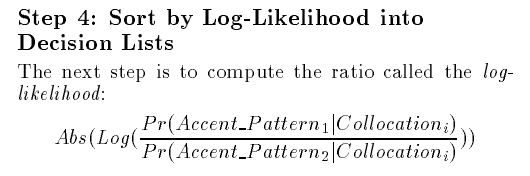

> Yarowasky, David -- "DECISION LISTS FOR LEXICAL AMBIGUITY RESOLUTION Application to Accent Restoration in Spanish and French" 1994

<div class="alert alert-block alert-success">
<b></b> We then classify the entries provided in the Line-test.xml file using the Previous 2 and Next Word decision lists (Assignment Minimum Method).  We will compare the results of Mimimum Method against the Baseline Method which is to use the default sense for the word line from WordNet which is that the sense of the word line(s) is a phone line.
    
We found also added a method which breaks the Previosu 2 Words into individual Decision Lists that preserve the word's postion as either -2W or -1W.  The results of the more Advanced Method classifier asre presented along with the Baseline and Minimum Methods.
</div>

<div class="alert alert-block alert-danger">
<b>Final Results:</b> Our Advanced classification Method has an average probability of classifying the sense of the word "line" at 69.2% based on the training data provided.  This is more capable than either the Baseline or the Assignment Minimum (twhere the respective average probabilities are 28.6% and 37.3%).
    
    Note: This script allows the programmer to choose to use the SpaCy lemmetizer, the WordNet Lemmetizer and either the Porter or Lancaster Stemmer.  The results are marginally different.

##### SpaCy Lemmetizer
> Assignment Minimum Method: Average Probability 37.0% 
    
> Advanced Method: Average Probability 68.3%
    
##### WordNet Lemmetizer
> Assignment Minimum Method: Average Probability 34.5%
    
> Advanced Method: Average Probability 66.4%
    
##### Stemmer Lancaster
> Assignment Minimum Method: Average Probability 38.0%
    
> Advanced Method: Average Probability 68.8%
    
##### Stemmer Porter
> Assignment Minimum Method: Average Probability 36.3%
    
> Advanced Method: Average Probability 67.4%
</div>

Tasks:
1. Using the training text, create decision lists with Yarowsky Log Likelihood Scores for each entry. The script flow is given below.

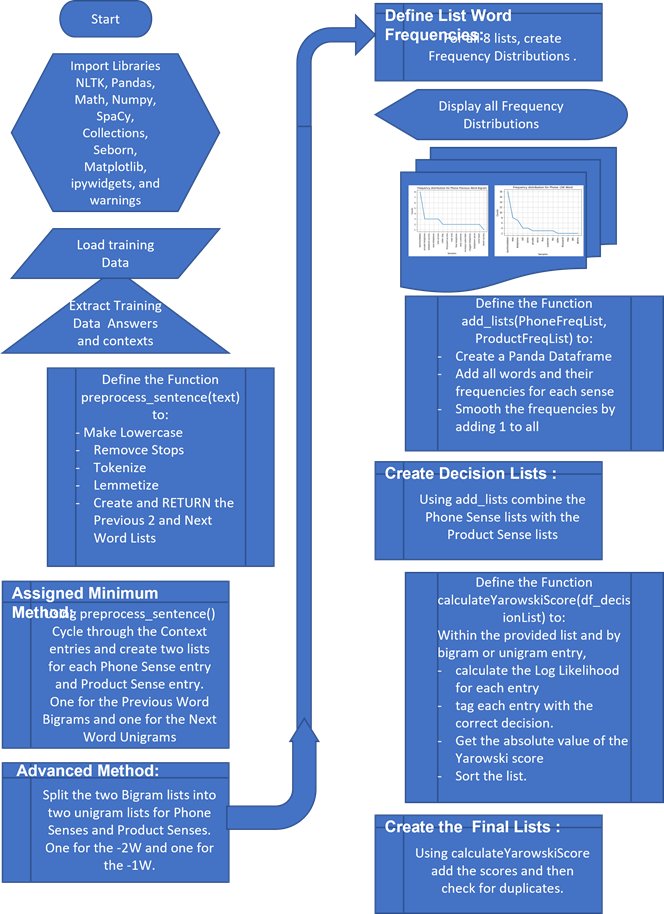

2. Using the Test Data, classify the context records and report on the results using a baseline, the asssiogned minimum and hte advance classifier.

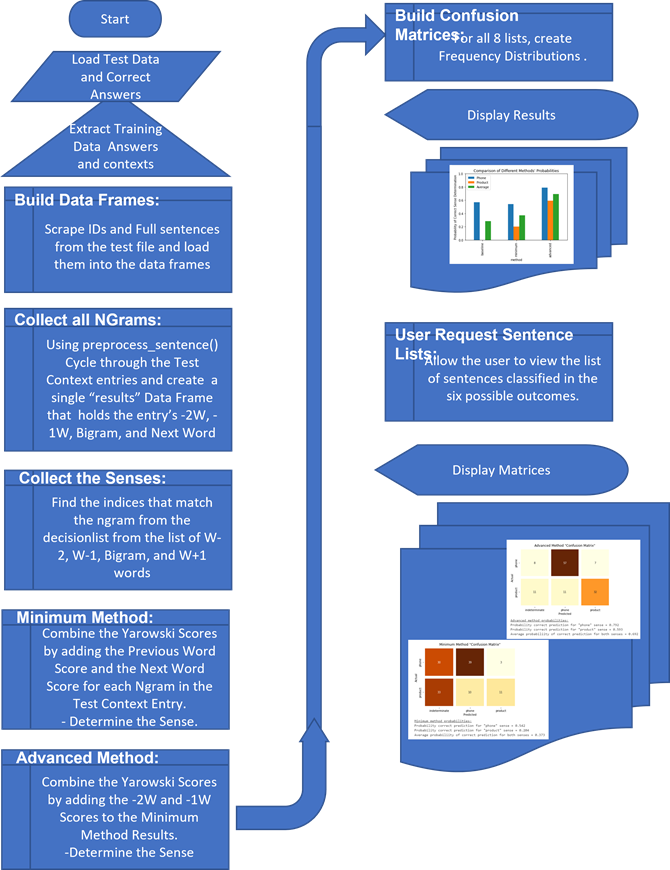

Your program should output the decision list it learns to *my-decision-list.txt*. You may format your decision list as you wish, but please make sure to show each feature, the log-likelihood score associated with it, and the sense it predicts. The file *my-decision-list.txt* is intended to be used as a log file in debugging your program. 
> We've created four *my-decision-lists.cvs* files that contain the lists ofr the bigrams, -2W, -1W and +1W lists.  They have 7 columns which are the index, the Ngram (feature), the number of times the Sense is Phone, the number of times the Sensethe number of times the Sense is Product, the yarowsky_score, the absolute value of the yarowski score, and the determined sense_decision.


Your program should output the answer tags it creates for each sentence to STDOUT. Your answer tags should be in the same format as found in line-answers.txt.

#### Our output can be found in the file "Team_5-line-answers.txt" 

Due: October 19, 2021 for extra credit (Due no later than 11/19)

## Import Libraries

In [1]:
import os
from bs4 import BeautifulSoup as bs
import re
from nltk import FreqDist,ConditionalFreqDist
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer (r'\w+')
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import pandas as pd
import math
import numpy as np
import spacy
from collections import Counter
import seaborn as sn
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets
import warnings

In [2]:
# suppress "future warnings" from Pandas merge function
warnings.filterwarnings("ignore")

# load spacy english library
nlp = spacy.load('en_core_web_sm', disable = ['parser','ner'])

In [3]:
# load training, testing, and answer datafiles 
# (this will work on anyone's machine as long at the data folder is in the project folder)

training_file_path_name = os.getcwd() + '/line-data/line-train.xml'

testing_file_path_name = os.getcwd() + '/line-data/line-test.xml'

testing_answers_file_path_name = os.getcwd() + '/line-data/line-answers.txt'

## Train

Open the training data and save it into the contasiner "TrainContents".
Use BeautifulSoup to scrap TrainContents into the iterable "Soup" and then .findall the <answer> components of Soup and save them inot the list "ans".   

In [4]:
# Opening and reading the train html file
TrainFile = open(training_file_path_name, "r")
TrainContents = TrainFile.read()
#print(TrainContents)
soup = bs(TrainContents, 'html.parser')
ans=soup.find_all('answer')
ans[:20]

[<answer instance="line-n.w9_10:6830:" senseid="phone"></answer>,
 <answer instance="line-n.w8_057:16550:" senseid="product"></answer>,
 <answer instance="line-n.w9_32:5971:" senseid="product"></answer>,
 <answer instance="line-n.w8_040:16401:" senseid="phone"></answer>,
 <answer instance="line-n.w7_011:12192:" senseid="product"></answer>,
 <answer instance="line-n.w8_069:17513:" senseid="product"></answer>,
 <answer instance="line-n.w7_017:14258:" senseid="product"></answer>,
 <answer instance="line-n.w7_035:14723:" senseid="product"></answer>,
 <answer instance="line-n.w7_114:11070:" senseid="product"></answer>,
 <answer instance="line-n.w9_8:1529:" senseid="phone"></answer>,
 <answer instance="line-n.w8_009:13819:" senseid="product"></answer>,
 <answer instance="line-n.w8_033:302:" senseid="phone"></answer>,
 <answer instance="line-n.w9_32:1849:" senseid="phone"></answer>,
 <answer instance="line-n.art7} aphb 54100154:" senseid="phone"></answer>,
 <answer instance="line-n.art7} aphb

### Using List, Map and Join, create a list of senseid (list_senseid) from the "ans" container.

- map() function returns a map object(which is an iterator) of the results after applying the given function to each item of a given iterable (list, tuple etc.)

- list(seq): Converts a tuple into a list.



In [5]:
list_senseid =list(map(str,ans))
#print(list_senseid)
list_senseid_join = ('..........'.join(list_senseid))
#print(type(list_senseid_phone))
#print(list_senseid_product1)

### Collect all the phone or line senses in a list called "senses"

Do this in trhe *order* they appeared in the traing data.  We will use this order list later to combine with the bigram and unigram lists for the decision list.

Create a freduency distribution of the "senses" using pattern matching and  match.group() method.

In [6]:
senses = []
pattern = re.compile(r'senseid="([p|P]roducts?|[P|p]hones?)"')
matches = pattern.finditer(list_senseid_join)
for match in matches:
    #print(match.group(1))
    senses.append(match.group(1))
Frequency_senses=FreqDist(senses)
print(Frequency_senses)
for record in Frequency_senses:
        print(record)

<FreqDist with 2 samples and 374 outcomes>
product
phone


### Collect the training data contexts
Scrape the contents of the training data into a list called *TrainingContext*

Create an iterable list of the TrainingContext using map() and list() and a version that has ".........." between the records into the container "list_TrainingContext1" for ease of viewing.

In [7]:
TrainingContext = soup.find_all('context') 
#print(type(text7))
TrainingContext
#print(TrainingContext)
list_TrainingContext =list(map(str,TrainingContext))
list_TrainingContext1 = ('..........'.join(list_TrainingContext))
print(list_TrainingContext[0], "\n")
print(list_TrainingContext1[:400], "\n")
#print(TrainingContext[:1])

<context>
<s>The New York plan froze basic rates, offered no protection to Nynex against an economic downturn that sharply cut demand and didn't offer flexible pricing.</s><s>In contrast, the California economy is booming, with 4.5% access <head>line</head> growth in the past year.</s>
</context> 

<context>
<s>The New York plan froze basic rates, offered no protection to Nynex against an economic downturn that sharply cut demand and didn't offer flexible pricing.</s><s>In contrast, the California economy is booming, with 4.5% access <head>line</head> growth in the past year.</s>
</context>..........<context>
<s>According to analysts, sales of PS/2 got off to a rocky start but have risen lat 



### Preprocess context records using *preprocess_sentence(text)*
Throuout the program, we will have to routinely preprocess context records.   This function accepts the records as "text" and does the following;
- Removes the *\<s>, \</s>, \<context>, \</context>, \n* markers
- Makes the text all lowercase.
- searches for the regular expression pattern *\<head>(line(s)?)\</head>* and inserts the tag *line_replace* used later to identify the location of the ambigious sense word.
- removes all numerical data.
- tokenizes the remaining sentence.
- removes all stop words.
- lemmatizes the remaining words.
- creates two lists "next_word" and "prev_word".
- addd two tags, *endline_added* and *startline_added* if the end of line or start oif line appears in the window, -2W, +1W fromt he sense word.
- returns the two lists "prev_word" and "next_word".

In [8]:
def lemmetizer1(wrds):
    #lemmatizer = WordNetLemmatizer()
    #lemmatized_output = [lemmatizer.lemmatize(w) for w in s_no_stop_words]
    
    lemmatizedWords = []
    lemmatizer = WordNetLemmatizer()
    for wrd in wrds:
        lemmatizedWords.append(lemmatizer.lemmatize(wrd))
    return (lemmatizedWords)

def lemmetizerSpcy(wrds):
    lemmatizedWords = []
    docmnt = ' '.join([str(item) for item in wrds])
    #print(docmnt)
    doc = nlp(docmnt)
    lemmatizedWords=' '.join([token.lemma_ for token in doc])
    #print(doc)
    #print(lemmatizedWords, '\n')
    lemmatizedWords = tokenizer.tokenize(lemmatizedWords)
    return (lemmatizedWords)

def stemmer(wrds):
    stemmedWords = []
    # Select which stemmer to use
    #ps = PorterStemmer()
    ps = LancasterStemmer()
    for wrd in wrds:
        if wrd == 'targetline':
            stemmedWords.append(wrd)
            #print(wrd,stemmedWords)
        else:
            stemmedWords.append(ps.stem(wrd))
        #print(wrd,ps.stem(wrd))
    #print(stemmedWords)
    return (stemmedWords)

def preprocess_sentence(text):
    kl=[]
    text = re.sub(r'<s>',' ', text)
    kl.append(re.sub(r'(<s>|</s>|<context>|</context>|\n)','',text))
       # kl.append(re.sub(r"\'",'',text))
    klpara= ''.join(kl)
    
    s = klpara.lower()

    next_word=[]
    prev_word=[]
    target = ["targetline"]

    stop_words = sorted(set(stopwords.words("english")))

    tokenizer = RegexpTokenizer (r'\w+')
    Sentences = sent_tokenize(s)

    for sent in Sentences:
        s_no_stop_words = []
        sent = re.sub(r'<head>(line(s)?)</head>','targetline', sent)
        sent = re.sub(r'\d(\.\d)?',r' ', sent)
        s_words_only = tokenizer.tokenize(sent)

        for wrd in s_words_only:
            if wrd not in stop_words:
                s_no_stop_words.append(wrd)

        #There are three options for Lemmetizing.  Choose one and comment out the others
        #lemmetized_tokens=lemmetizerSpcy(s_no_stop_words)
        #lemmetized_tokens=lemmetizer1(s_no_stop_words)
        
        lemmetized_tokens=stemmer(s_no_stop_words)
        #print(lemmetized_tokens)
        
        for i, w in enumerate(lemmetized_tokens):
            #print(i, w)
            if w in target:
                # next word
                if i<len(lemmetized_tokens)-1:
                    #print(s_no_stop_words[i+1],"\n")
                    next_word.append(lemmetized_tokens[i+1])
                else:
                    next_word.append('endlineAdded')

                # previous word
                if i>1:
                    #print(' '.join(words[i-2 : i]))
                    #print(s_no_stop_words[i-2:i],"\n")
                    prev_word.append(' '.join(lemmetized_tokens[i-2:i]))
                elif i==1:
                    prev_word.append('startlineAdded '+lemmetized_tokens[i-1])
                    #print("startline_added", lemmetized_tokens[i-1],lemmetized_tokens[i+1])
                else:
                    prev_word.append('startlineAdded')
                    #print('   ',"startline_added",lemmetized_tokens[i+1])


    return prev_word, next_word

### Using *preprocess_sentence(text)* create bigram and unigram lists

Iterate through the "list_TrainingContext" and find the bigram and unigrams. append these results to;
- create a list of the -2W from the sense word called "previousWords"
- create a list of the +2W from the sense word called "nextWords"

In [9]:
kl=[]
nextWords=[]
previousWords=[]
print(len(list_TrainingContext))
for record in list_TrainingContext:
    prevWd, nextWd = preprocess_sentence(record)
    previousWords = previousWords+prevWd
    nextWords = nextWords+nextWd

print("The number of unigrams found are:",len(nextWords),end=''+'\n')  
print("The first five unigrams are:", nextWords,"\n") #,end=''+'\n\n\n')

print("The number of bigrams found are:", len(previousWords),end=''+'\n')  
print("The first five bigrams are:", previousWords,"\n") #,end='')

print("The total number of records in the sense and context lists are:", len(ans), "and", len(TrainingContext))

374
The number of unigrams found are: 374
The first five unigrams are: ['grow', 'new', 'scrapped', 'cur', 'first', 'endlineAdded', 'mil', 'smal', 'property', 'ord', 'could', 'big', 'get', 'endlineAdded', 'busy', 'increas', 'endlineAdded', 'link', 'endlineAdded', 'consist', 'endlineAdded', 'mr', 'mammograph', 'mak', 'spread', 'may', 'dead', 'brad', 'try', 'mak', 'many', 'increas', 'endlineAdded', 'endlineAdded', 'said', 'us', 'phon', 'aircraft', 'produc', 'mad', 'delux', 'pet', 'rec', 'millionair', 'rewrit', 'dec', 'endlineAdded', 'softw', 'comput', 'cherub', 'endlineAdded', 'show', 'custom', 'hasbro', 'yesterday', 'endlineAdded', 'first', 'chevrolet', 'endlineAdded', 'sec', 'overs', 'less', 'los', 'swor', 'kraft', 'bil', 'dead', 'worst', 'continu', 'mr', 'publ', 'endlineAdded', 'precid', 'let', 'light', 'hom', 'endlineAdded', 'charg', 'poorest', 'monteil', 'stil', 'on', 'dead', 'cellul', 'ad', 'cloth', 'on', 'endlineAdded', 'rang', 'aim', 'endlineAdded', 'hurt', 'mid', 'endlineAdded', 

In [10]:
BigramPhone=[]
BigramProduct=[]
p1W_Phone=[]
p1W_Product=[]

for i in range(len(senses)):
    if(senses[i]=="phone"):
        BigramPhone.append(previousWords[i])
        p1W_Phone.append(nextWords[i])
    else:
        BigramProduct.append(previousWords[i])
        p1W_Product.append(nextWords[i]) 

print("Phone Bigram and Unigram lengths:", len(BigramPhone), len(p1W_Phone), "\n")
print("Product Bigram and Unigram lengths:", len(BigramProduct),  len(p1W_Product), "\n")

# Time to create the -2W and -1W unigram lists
# m2W_Phone, m1W_Phone, m2W_Product and m1W_Product

# needed to regenerate the tokenizer
tokenizer = RegexpTokenizer (r'\w+')

#Separate the Phone Bigram list into two lists (m2W_Phone, m1W_Phone)
m2W_Phone=[]
m1W_Phone=[]
for bigram in BigramPhone:
    n_grams = tokenizer.tokenize(bigram)
    #print(n_grams[0], n_grams[1])
    m2W_Phone.append(n_grams[0])
    try:
        m1W_Phone.append(n_grams[1])
    except:
        m1W_Phone.append(' ')            
    
print("Phone -2W and -1W Unigram lengths:", len(m2W_Phone), len(m1W_Phone), "\n")

    
#Separate the Product Bigram list into two lists (m2W_Product, m1W_Product)
m2W_Product=[]
m1W_Product=[]
for bigram in BigramProduct:
    n_grams = tokenizer.tokenize(bigram)
    #print(n_grams[0], n_grams[1])
    m2W_Product.append(n_grams[0])
    try:
        m1W_Product.append(n_grams[1])
    except:
        m1W_Product.append(' ')
    
print("Product -2W and -1W Unigram lengths:", len(m2W_Product),  len(m1W_Product), "\n")
# for i in range(len(m2W_Phone)):
#    print(BigramPhone[i], '->', m2W_Phone[i], m1W_Phone[i])

Phone Bigram and Unigram lengths: 178 178 

Product Bigram and Unigram lengths: 196 196 

Phone -2W and -1W Unigram lengths: 178 178 

Product -2W and -1W Unigram lengths: 196 196 



### Summary to this point
At this point we have the;
- list of Senses in order
- list of -2W bigrams in order
- list of +1W unigrams in order

### Separate the lists "previousWords" and "nextWords" according tot heir respective "senses"
- bigram for the sense "phone" - BigramPhone 
- unigram for the sense "phone" - UnigramPhone 
- bigram for the sense "product" - BigramProduct 
- unigram for the sense "product" - UnigramProduct

Check to see they are the same length

### Frequencies
Find the frequecies of the n-grams and tag each tuple with its frequency using counter
 

In [33]:
bigramPhoneFreq = FreqDist(BigramPhone)
bigramProductFreq =FreqDist(BigramProduct)
p1W_PhoneFreq = FreqDist(p1W_Phone)
p1W_ProductFreq =FreqDist(p1W_Product)
m2W_PhoneFreq = FreqDist(m2W_Phone)
m2W_ProductFreq =FreqDist(m2W_Product)
m1W_PhoneFreq = FreqDist(m1W_Phone)
m1W_ProductFreq =FreqDist(m1W_Product)

bigramPhoneFreq

FreqDist({'startlineAdded': 8, 'priv telephon': 3, 'telephon access': 3, 'new telephon': 3, 'new access': 3, 'cal stay': 2, 'thousand access': 2, 'man end': 2, 'fre telephon': 2, 'new custom': 2, ...})

Phone Previous Word Bigrams: <FreqDist with 154 samples and 178 outcomes>


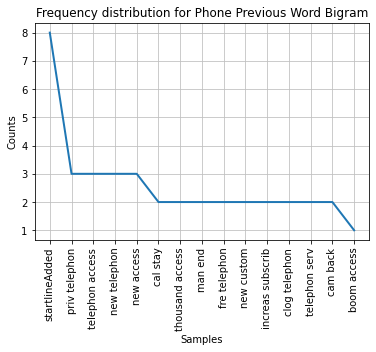

Phone -2W: <FreqDist with 105 samples and 178 outcomes>


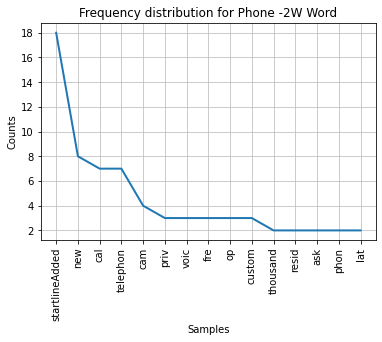

Phone -1W: <FreqDist with 105 samples and 178 outcomes>


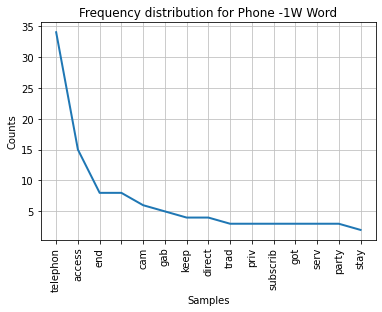

Phone +1W: <FreqDist with 105 samples and 178 outcomes>


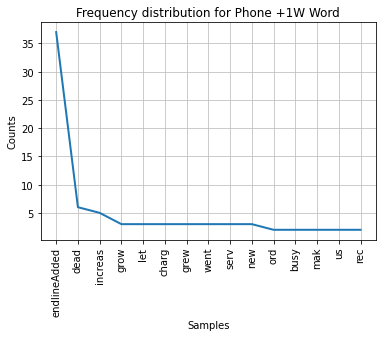

Product Previous Word Bigrams: <FreqDist with 184 samples and 196 outcomes>


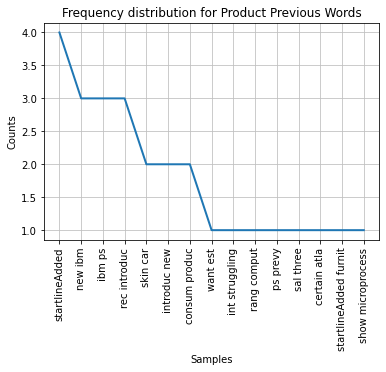

Product -2W: <FreqDist with 150 samples and 196 outcomes>


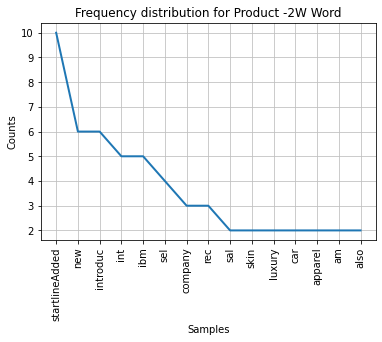

Product -1W: <FreqDist with 130 samples and 196 outcomes>


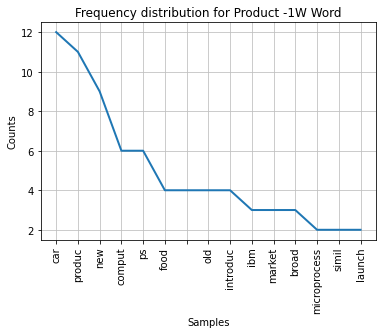

Product +1W: <FreqDist with 138 samples and 196 outcomes>


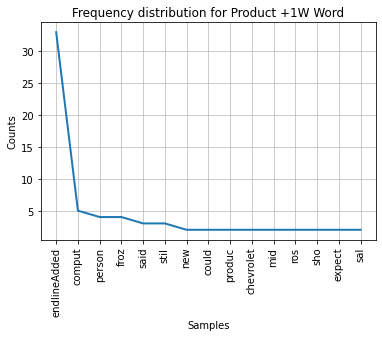

Product Previous Word Bigrams:
 [('startlineAdded', 4), ('new ibm', 3), ('ibm ps', 3), ('rec introduc', 3), ('skin car', 2), ('introduc new', 2), ('consum produc', 2), ('want est', 1), ('int struggling', 1), ('rang comput', 1)] 

Phone Previous Word Bigrams:
 [('startlineAdded', 8), ('priv telephon', 3), ('telephon access', 3), ('new telephon', 3), ('new access', 3), ('cal stay', 2), ('thousand access', 2), ('man end', 2), ('fre telephon', 2), ('new custom', 2)] 



Product -2W Words:
 [('startlineAdded', 10), ('new', 6), ('introduc', 6), ('int', 5), ('ibm', 5), ('sel', 4), ('company', 3), ('rec', 3), ('sal', 2), ('skin', 2)] 

Phone -2W Word:
 [('startlineAdded', 18), ('new', 8), ('cal', 7), ('telephon', 7), ('cam', 4), ('priv', 3), ('voic', 3), ('fre', 3), ('op', 3), ('custom', 3)] 



Product -1W Words:
 [('car', 12), ('produc', 11), ('new', 9), ('comput', 6), ('ps', 6), ('food', 4), (' ', 4), ('old', 4), ('introduc', 4), ('ibm', 3)] 

Phone -1W Words:
 [('telephon', 34), ('access',

In [34]:
print('Phone Previous Word Bigrams:', FreqDist(bigramPhoneFreq))
bigramPhoneFreq.plot(15,title='Frequency distribution for Phone Previous Word Bigram')
print('Phone -2W:', FreqDist(p1W_PhoneFreq))
m2W_PhoneFreq.plot(15,title='Frequency distribution for Phone -2W Word')
print('Phone -1W:', FreqDist(p1W_PhoneFreq))
m1W_PhoneFreq.plot(15,title='Frequency distribution for Phone -1W Word')
print('Phone +1W:', FreqDist(p1W_PhoneFreq))
p1W_PhoneFreq.plot(15,title='Frequency distribution for Phone +1W Word')


#print('For phone sense')
bigramPhoneFreq=Counter(BigramPhone).most_common()
m2W_PhoneFreq=Counter(m2W_Phone).most_common()
m1W_PhoneFreq=Counter(m1W_Phone).most_common()
p1W_PhoneFreq=Counter(p1W_Phone).most_common()


print('Product Previous Word Bigrams:', FreqDist(bigramProductFreq))
bigramProductFreq.plot(15,title='Frequency distribution for Product Previous Words')
print('Product -2W:', FreqDist(m2W_ProductFreq))
m2W_ProductFreq.plot(15,title='Frequency distribution for Product -2W Word')
print('Product -1W:', FreqDist(m1W_ProductFreq))
m1W_ProductFreq.plot(15,title='Frequency distribution for Product -1W Word')
print('Product +1W:', FreqDist(p1W_ProductFreq))
p1W_ProductFreq.plot(15,title='Frequency distribution for Product +1W Word')


#print('For product sense')
bigramProductFreq=Counter(BigramProduct).most_common()
m2W_ProductFreq=Counter(m2W_Product).most_common()
m1W_ProductFreq=Counter(m1W_Product).most_common()
p1W_ProductFreq=Counter(p1W_Product).most_common()

print("Product Previous Word Bigrams:\n", bigramProductFreq[:10],'\n')
print("Phone Previous Word Bigrams:\n", bigramPhoneFreq[:10],'\n\n\n')

print("Product -2W Words:\n", m2W_ProductFreq[:10],'\n')
print("Phone -2W Word:\n", m2W_PhoneFreq[:10],'\n\n\n')

print("Product -1W Words:\n", m1W_ProductFreq[:10],'\n')
print("Phone -1W Words:\n", m1W_PhoneFreq[:10],'\n\n\n')

print("Product +1W words:\n", p1W_ProductFreq[:10],'\n')
print("Phone +1W words:\n", p1W_PhoneFreq[:10],'\n\n\n')

### Merge the common lists into a Panda Dataframe

We now have to create four lists--two (bigram and unigram) for the sense "phone" and two for the sense "product". We need to merge the two bigram lists and add two columns that hold the counts for Phone and Product.  these need to be sorted and combined when the bigrams are trhe same.

In [35]:
def add_lists(PhoneFreqList, ProductFreqList):
    df_decisionList = pd.DataFrame(columns=['Ngram', 'Sense[Phone]', 'Sense[Product]'])
    for element, n in PhoneFreqList:
        known = False
        for ele, p in ProductFreqList:
            if ele == element:
                #print(ele, p, element, n)
                known = True
                ptrElement = p
                
        if known == True:
            #print(element, n)
            #ptrElement = ProductFreqList[0].index(element)
            df_decisionList = df_decisionList.append({'Ngram':element, 'Sense[Phone]':(n+1), 'Sense[Product]':(ProductFreqList[ptrElement][1]+1)}, ignore_index=True)
            #print(element)
        else:
            df_decisionList = df_decisionList.append({'Ngram':element, 'Sense[Phone]':(n+1), 'Sense[Product]':1}, ignore_index=True)

    for element, n in ProductFreqList:
        known = False
        for ele, p in PhoneFreqList:
            if ele == element:
                known = True      
        
        if known == True:
            #n2 = ProductFreqList[0].index(element)
            #print("Duplicate element:",ProductFreqList[0].index(element), ProductFreqList[n2][1])
            continue
        else:
            df_decisionList = df_decisionList.append({'Ngram':element, 'Sense[Phone]':1, 'Sense[Product]':(n+1)}, ignore_index=True)
            
    df_decisionList=df_decisionList.sort_values(by=['Ngram'])

    return df_decisionList

#print("Combining Previous Word Bigrams:")
df_decisionList_bigram = add_lists(bigramPhoneFreq, bigramProductFreq)

#print("Combining Previous -2W Words:")
df_decisionList_m2W = add_lists(m2W_PhoneFreq, m2W_ProductFreq)
#df_decisionList_m2W.to_csv('df_decisionList_m2W.csv')

#print("Combining Previous -1W Words:")
df_decisionList_m1W = add_lists(m1W_PhoneFreq, m1W_ProductFreq)
#df_decisionList_m1W.to_csv('df_decisionList_m1W.csv')

#print("Combining Next Words:")
df_decisionList_p1W = add_lists(p1W_PhoneFreq, p1W_ProductFreq)

print("The following lists have been smoothed by adding one to every entry")

print("Previous Words Bigrams:", len(df_decisionList_bigram))
print(df_decisionList_bigram.head(),'\n')

print("Previous word -2W:", len(df_decisionList_m2W))
print(df_decisionList_m2W.head(),'\n')

print("Previous word -1W:", len(df_decisionList_m1W))
print(df_decisionList_m1W.head(),'\n')

print("Next word +1W:", len(df_decisionList_p1W))
print(df_decisionList_p1W.head(),'\n')

The following lists have been smoothed by adding one to every entry
Previous Words Bigrams: 337
             Ngram Sense[Phone] Sense[Product]
176      abex corp            1              2
145       abus sex            2              1
28   accommod many            2              1
190    acquir food            1              2
94       ad import            2              1 

Previous word -2W: 253
        Ngram Sense[Phone] Sense[Product]
144      abex            1              2
112      abus            2              1
33   accommod            2              1
155    acquir            1              2
74         ad            2              7 

Previous word -1W: 203
        Ngram Sense[Phone] Sense[Product]
3                        9              7
1      access           16              1
183    acquir            1              2
191    advert            1              2
123  aerospac            1              2 

Next word +1W: 224
        Ngram Sense[Phone] Sense[Product]
85   

In [36]:
# calculate the Yarowsky score, absolute value of Yarowsky score for sorting decision tree, and column of sense decision
def calculateYarowskiScore(df_decisionList):
    df_decisionList['yarowsky_score'] = np.log(df_decisionList['Sense[Phone]'].astype(float)/df_decisionList['Sense[Product]'].astype(float))
    df_decisionList['abs_val_yar_score'] = np.absolute(df_decisionList['yarowsky_score'])
    df_decisionList['sense_decision'] = np.where(df_decisionList['yarowsky_score'] < 0, 'product', 'phone')
    df_decisionList_p1W=df_decisionList.sort_values(by=['abs_val_yar_score'], ascending=False)
    return df_decisionList



In [55]:
df_decisionList_bigram = calculateYarowskiScore(df_decisionList_bigram)
df_decisionList_bigram.to_csv('df_decisionList_bigram.csv')
df_decisionList_bigram

,Ngram,Sense[Phone],Sense[Product],yarowsky_score,abs_val_yar_score,sense_decision
176,abex corp,1,2,-0.693147,0.693147,product
145,abus sex,2,1,0.693147,0.693147,phone
28,accommod many,2,1,0.693147,0.693147,phone
190,acquir food,1,2,-0.693147,0.693147,product
94,ad import,2,1,0.693147,0.693147,phone
...,...,...,...,...,...,...
160,want est,1,2,-0.693147,0.693147,product
136,x rat,2,1,0.693147,0.693147,phone
73,year mil,2,1,0.693147,0.693147,phone
306,year sew,1,2,-0.693147,0.693147,product


In [56]:
df_decisionList_m2W = calculateYarowskiScore(df_decisionList_m2W)
df_decisionList_m2W.to_csv('df_decisionList_m2W.csv')
df_decisionList_m2W

,Ngram,Sense[Phone],Sense[Product],yarowsky_score,abs_val_yar_score,sense_decision
144,abex,1,2,-0.693147,0.693147,product
112,abus,2,1,0.693147,0.693147,phone
33,accommod,2,1,0.693147,0.693147,phone
155,acquir,1,2,-0.693147,0.693147,product
74,ad,2,7,-1.252763,1.252763,product
...,...,...,...,...,...,...
152,volum,1,2,-0.693147,0.693147,product
132,want,1,2,-0.693147,0.693147,product
107,x,2,1,0.693147,0.693147,phone
62,year,2,7,-1.252763,1.252763,product


In [57]:
df_decisionList_m1W = calculateYarowskiScore(df_decisionList_m1W)
df_decisionList_m1W.to_csv('df_decisionList_m1W.csv')
df_decisionList_m1W

,Ngram,Sense[Phone],Sense[Product],yarowsky_score,abs_val_yar_score,sense_decision
3,,9,7,0.251314,0.251314,phone
1,access,16,1,2.772589,2.772589,phone
183,acquir,1,2,-0.693147,0.693147,product
191,advert,1,2,-0.693147,0.693147,product
123,aerospac,1,2,-0.693147,0.693147,product
...,...,...,...,...,...,...
151,wom,1,2,-0.693147,0.693147,product
63,would,2,1,0.693147,0.693147,phone
200,x,1,2,-0.693147,0.693147,product
158,ziar,1,2,-0.693147,0.693147,product


In [58]:
df_decisionList_p1W = calculateYarowskiScore(df_decisionList_p1W)
df_decisionList_p1W.to_csv('df_decisionList_p1W.csv')
df_decisionList_p1W

,Ngram,Sense[Phone],Sense[Product],yarowsky_score,abs_val_yar_score,sense_decision
85,accord,2,1,0.693147,0.693147,phone
16,ad,3,1,1.098612,1.098612,phone
73,adapt,2,1,0.693147,0.693147,phone
142,aim,1,2,-0.693147,0.693147,product
125,aircraft,1,2,-0.693147,0.693147,product
...,...,...,...,...,...,...
79,wist,2,1,0.693147,0.693147,phone
180,wom,1,2,-0.693147,0.693147,product
90,world,2,1,0.693147,0.693147,phone
41,worst,2,1,0.693147,0.693147,phone


### We needed to check the results to make sure there were no duplicates.  This was because the earlier algorithm were not creating hte dat frames corectly.  this is a check to make sure the code works to this point. 

In [59]:
def areThereDups(df_decisionList):
    duplicates = df_decisionList.groupby('Ngram').count().sort_values('yarowsky_score', ascending=False)\
                                .rename(columns={'yarowsky_score':'count_of_repeats'})    
    duplicates.drop(['Sense[Phone]','Sense[Product]','abs_val_yar_score','sense_decision'], axis=1, inplace=True)
    duplicates = duplicates[duplicates['count_of_repeats']>1]
    return duplicates

areThereDups(df_decisionList_bigram).to_csv('decision_list_bighram_duplicates.csv')
areThereDups(df_decisionList_m2W).to_csv('decision_list_m2W_duplicates.csv')
areThereDups(df_decisionList_m1W).to_csv('decision_list_m1W_duplicates.csv')
areThereDups(df_decisionList_p1W).to_csv('decision_list_p1W_duplicates.csv')

# Test Data


* Verify that the IDs of line-test and line-answers are in the same order in their resptive files 
* load full sentences and sense answers into dataframe for use in showing results

In [60]:
with open(testing_answers_file_path_name, 'r') as file:
    incoming_answers = bs(file, 'lxml')
    
with open(testing_file_path_name, 'r') as file:
    incoming_tests = bs(file, 'lxml')

In [61]:
# find all instance names and the identified sense for each
# verify that they have the same number of items within them

answer_lines = incoming_answers.find_all('answer')
print(len(answer_lines))
for line in answer_lines[0:1]:
    print(line)
    
print()

test_lines = incoming_tests.find_all('instance')
print(len(test_lines))
for line in test_lines[0:1]:
    print(line)

126
<answer instance="line-n.w8_059:8174:" senseid="phone"></answer>

126
<instance id="line-n.w8_059:8174:">
<context>
<s>Advanced Micro Devices Inc., Sunnyvale, Calif., and Siemens AG of West Germany said they agreed to jointly develop, manufacture and market microchips for data communications and telecommunications with an emphasis on the integrated services digital network.</s><s>The integrated services digital network, or ISDN, is an international standard used to transmit voice, data, graphics and video images over telephone lines .</s>
</context>
</instance>


In [62]:
# Use a dataframe to hold each test id and answer id

# scrape IDs and full sentences from the test-lines.xml file and load them into dataframes
transport_test_id_to_df = []
transport_sent_to_df= [] 
for i in range(len(test_lines)):
    transport_test_id_to_df.append([test_lines[i].attrs['id']])
    transport_sent_to_df.append([test_lines[i].get_text().replace("\n", "")])
test_data_df = pd.DataFrame(transport_test_id_to_df, columns = ['question_id'])


# scrape IDs and sense answers from line-answers.xml (we changed extension from .txt to .xml)
# and load them into dataframes
transport_answer_id_to_df = []
transport_sense_to_df = []
for i in range(len(answer_lines)):
    transport_answer_id_to_df.append(answer_lines[i].attrs['instance'])
    transport_sense_to_df.append(answer_lines[i].attrs['senseid'])
    
# Verify that test and the answers ids are in the same order in each file
test_data_df['answer_id'] = transport_answer_id_to_df
test_data_df['sense'] = transport_sense_to_df

# check that the sequence of IDs match in each xml
test_data_df['ids_match'] = (test_data_df['question_id'] == test_data_df['answer_id'])
match_results = (test_data_df[test_data_df['ids_match'] == False])
if match_results.empty:
    print('The order of test questions and answers in the separate files match')
else:
    print('The order of test questions and answers in the separate files do not match')    
    
# load the test question sentences and the answers into a dataframe for use after using the 
# Yarowsky algorithm to predict word sense
answer_data_df = pd.DataFrame(transport_answer_id_to_df, columns = ['answer_id'])
answer_data_df['sentence'] = transport_sent_to_df
answer_data_df['answer_sense'] = transport_sense_to_df

The order of test questions and answers in the separate files match


In [63]:
# Delete the dataframe now that we know they are in the same order
del test_data_df

###  Open the test test data 
Open the test data and save it into the contasiner "TestContents".
Use BeautifulSoup to scrap TrainContents into the iterable "Soup"

In [64]:
# Opening and reading the test html file
TestFile = open(testing_file_path_name, "r")
TestContents = TestFile.read()
soup = bs(TestContents, 'html.parser')
text = soup.find_all('context') 
print(type(text))
text
list_context =list(map(str,text))
#list_context1 = ('..........'.join(list_context))
len(list_context)


<class 'bs4.element.ResultSet'>


126

### Using preprocess_sentence(text) create bigram and unigram lists
Iterate through the "list_context" and find the bigram and unigrams.
<br>Create the dataframe that contains:
 <br>The bigram: W-1 word and W-2 word
 <br>W-1 word
 <br>W-2 word
 <br>W+1 word


In [65]:
kl=[]
nextWords=[]
previousWords=[]
for record in list_context:
    prevWd, nextWd = preprocess_sentence(record)
    previousWords = previousWords+prevWd
    nextWords = nextWords+nextWd
# Spliting bigram into two unigrams and put them into a dataframe
individual_word = [item.split(" ") for item in previousWords]
result_df = pd.DataFrame(individual_word, columns= ('m2','m1'))
result_df['m2'] = result_df['m2'].astype(str)
result_df['m1'] = result_df['m1'].astype(str)
# Adding the bigram, and W+1 into the dataframe
result_df['bigram'] =  previousWords
result_df['p1'] = nextWords
result_df['bigram'] = result_df['bigram'].astype(str)
result_df['p1'] = result_df['p1'].astype(str)
result_df.head(2)

,m2,m1,bigram,p1
0,im,telephon,im telephon,endlineAdded
1,cal,keep,cal keep,op


## Match algorithm


#### Find the indices that match the ngram from the decisionlist from the list of W-2, W-1, Bigram, and W+1 words

In [66]:
# add blank columns to result_df for holding the Yarowski scores for each ngram position
score_column_names = ['m2_score','m1_score','bigram_score','p1_score']
for name in score_column_names:
    result_df[name] = np.nan
     
# iterate through the rows of the dataframe with the test data
for i, row in result_df.iterrows():
    
    # select each of the ngrams from the row one at a time
    for j in range(4):
        k = j+4
        test_value = row[j]
        
        # find matching value in decision list and add it to the test data dataframe
        if j == 0:
            test_results = df_decisionList_m2W[(df_decisionList_m2W['Ngram'] == test_value)]
        elif j == 1:
            test_results = df_decisionList_m1W[(df_decisionList_m1W['Ngram'] == test_value)]
        elif j == 2:
            test_results = df_decisionList_bigram[(df_decisionList_bigram['Ngram'] == test_value)]
        else:
            test_results = df_decisionList_p1W[(df_decisionList_p1W['Ngram'] == test_value)]
        
        if test_results.empty:
            pass
        else:
            value = test_results.iloc[0,3]
            result_df.iloc[i,k] = value
            
# fill NaN values with 0 so summing can be done
result_df.fillna(0, inplace=True)

# calculate the sum of ngram scores to determine the sense (positive = phone, negative = product)
result_df['sum_of_scores'] = result_df['m2_score'] + result_df['m1_score'] + result_df['bigram_score'] + result_df['p1_score']

phone_indexes = result_df[result_df['sum_of_scores'] > 0].index
product_indexes = result_df[result_df['sum_of_scores'] < 0].index
indeterminate_indexes = result_df[result_df['sum_of_scores'] == 0].index
result_df.loc[phone_indexes, 'determined_sense'] = 'phone'
result_df.loc[product_indexes, 'determined_sense'] = 'product'
result_df.loc[indeterminate_indexes, 'determined_sense'] = 'indeterminate'

# calculate the score for the minimum method (whichever is greater, the W-2:W-1 bigram or the W+1 unigram)
result_df['min_meth_sum_of_scores'] = result_df['bigram_score'] + result_df['p1_score']

phone_indexes = result_df[result_df['min_meth_sum_of_scores'] > 0].index
product_indexes = result_df[result_df['min_meth_sum_of_scores'] < 0].index
indeterminate_indexes = result_df[result_df['min_meth_sum_of_scores'] == 0].index
result_df.loc[phone_indexes, 'min_meth_determined_sense'] = 'phone'
result_df.loc[product_indexes, 'min_meth_determined_sense'] = 'product'
result_df.loc[indeterminate_indexes, 'min_meth_determined_sense'] = 'indeterminate'

In [67]:
# add the determined sense to the answer dataframe for scoring
answer_data_df['determined_sense'] = result_df['determined_sense']

# score each result
answer_data_df['result_score'] = np.where(answer_data_df['answer_sense'] == 
                                          answer_data_df['determined_sense'], 1, 0)


# add the minimum method determined sense to the answer dataframe for scoring
answer_data_df['min_meth_determined_sense'] = result_df['min_meth_determined_sense']

# score each result
answer_data_df['min_meth_result_score'] = np.where(answer_data_df['answer_sense'] == 
                                          answer_data_df['min_meth_determined_sense'], 1, 0)


# add in baseline algorithm sense determination and scores
# (baseline is the the sense that occurs most frequently - this was "product"
# in the training data but the "telephone" sense ranks higher in the Wordnet
# lexical database so we used that sense as the default value)
answer_data_df['baseline_sense'] = 'phone'
answer_data_df['baseline_score'] = np.where(answer_data_df['answer_sense'] == 
                                          answer_data_df['baseline_sense'], 1, 0)

answer_data_df

,answer_id,sentence,answer_sense,determined_sense,result_score,min_meth_determined_sense,min_meth_result_score,baseline_sense,baseline_score
0,line-n.w8_059:8174:,"[Advanced Micro Devices Inc., Sunnyvale, Calif...",phone,phone,1,phone,1,phone,1
1,line-n.w7_098:12684:,[In your May 21 story about the phone industry...,phone,phone,1,phone,1,phone,1
2,line-n.w8_106:13309:,"[But he doesn't apologize for the idea, becaus...",phone,phone,1,phone,1,phone,1
3,line-n.w9_40:10187:,[Callers are invited to play interactive games...,phone,phone,1,phone,1,phone,1
4,line-n.w9_16:217:,[Its 10 million people are burdened with an $1...,phone,phone,1,phone,1,phone,1
...,...,...,...,...,...,...,...,...,...
121,line-n.w7_100:15579:,[She owns a London wine bar and recently bough...,product,product,1,product,1,phone,0
122,line-n.w7_071:6321:,"[In Mr. Welch's view, consumer electronics' ma...",product,indeterminate,0,phone,0,phone,0
123,line-n.w8_110:14049:,"[""Microsoft has done a much better job in deli...",product,product,1,indeterminate,0,phone,0
124,line-n.w7_108:4296:,[Rochester Telephone Corp. said it signed a le...,phone,phone,1,phone,1,phone,1


### Output the results
Your program should output the answer tags it creates for each sentence to STDOUT. Your answer tags should be in the same format as found in line-answers.txt.

#### Our output can be found in the file "Team_5-line-answers.txt" 

In [68]:
with open('Team_5-line-answers.txt', 'w', encoding = 'utf-8') as f:
    for rec_index, rec in answer_data_df.iterrows():
        f.write('answer instance=\"'+rec['answer_id']+':\" senseid=\"'+rec['determined_sense']+'\"/>'+'\n')
f.close()

In [69]:
# create a confusion matrix for reporting baseline results
baseline_confusion_matrix = pd.crosstab(answer_data_df['answer_sense'],
                                        answer_data_df['baseline_sense'],
                                        rownames=['Actual'],
                                        colnames=['Predicted'])

# The baseline algorithm doesn't predict "product" for any occurance of "line", therefore
# the pd.crosstab function doesn't create a column for Predicted->Phone. This code adds 0
# for Actual->Product/Predicted->Product and Actual->Phone/Predicted->Product so that the 
# "confusion matrix" displayed is a 2x2 square instead of a 1x2 box.
baseline_confusion_matrix['product'] = 0

# create a confusion matrix for reporting determined results
determined_confusion_matrix = pd.crosstab(answer_data_df['answer_sense'],
                               answer_data_df['determined_sense'],
                               rownames=['Actual'],
                               colnames=['Predicted'])

# create a confusion matrix for reporting minimum method determined results
min_meth_determined_confusion_matrix = pd.crosstab(answer_data_df['answer_sense'],
                               answer_data_df['min_meth_determined_sense'],
                               rownames=['Actual'],
                               colnames=['Predicted'])

In [70]:
# calculate the baseline probabilities
prob_correct_phone_baseline = (baseline_confusion_matrix.loc['phone','phone']/
                              (baseline_confusion_matrix.loc['product','phone'] +
                               baseline_confusion_matrix.loc['phone','phone']))

# don't need to calculate the probability for the baseline algorithm correctly predicting
# product since it always predicts phone. Therefore, we just set the value = 0
prob_correct_prod_baseline = (0)

# don't need to add the prob_correct_prod_baseline to calculate the average since
# it's 0
average_correct_prob_baseline = prob_correct_phone_baseline / 2


# calculate the determined probabilities
prob_correct_phone_determined = (determined_confusion_matrix.loc['phone','phone']/
                                (determined_confusion_matrix.loc['phone','phone'] + 
                                 determined_confusion_matrix.loc['phone','product'] +
                                 determined_confusion_matrix.loc['phone','indeterminate']))

prob_correct_prod_determined = (determined_confusion_matrix.loc['product','product']/
                               (determined_confusion_matrix.loc['product','phone'] + 
                                determined_confusion_matrix.loc['product','product'] +
                                determined_confusion_matrix.loc['product','indeterminate']))

average_correct_prob_determined = (prob_correct_phone_determined + prob_correct_prod_determined) / 2


# calculate the minimum method determined probabilities
prob_correct_phone_min_meth_determined = (min_meth_determined_confusion_matrix.loc['phone','phone']/
                                         (min_meth_determined_confusion_matrix.loc['phone','phone'] + 
                                          min_meth_determined_confusion_matrix.loc['phone','product'] +
                                          min_meth_determined_confusion_matrix.loc['phone','indeterminate']))

prob_correct_prod_min_meth_determined = (min_meth_determined_confusion_matrix.loc['product','product']/
                                        (min_meth_determined_confusion_matrix.loc['product','phone'] + 
                                         min_meth_determined_confusion_matrix.loc['product','product'] +
                                         min_meth_determined_confusion_matrix.loc['product','indeterminate']))

average_correct_prob_min_meth_determined = (prob_correct_phone_min_meth_determined + prob_correct_prod_min_meth_determined) / 2

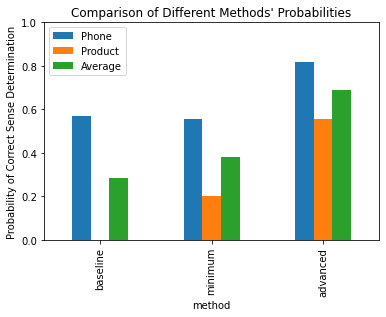

In [71]:
# Display probabilities for all three algorithms as a bar chart
probability_values = {'method' : ['baseline', 'minimum', 'advanced'],
                      'Phone' : [prob_correct_phone_baseline, prob_correct_phone_min_meth_determined, prob_correct_phone_determined],
                      'Product' : [prob_correct_prod_baseline, prob_correct_prod_min_meth_determined, prob_correct_prod_determined],
                      'Average' : [average_correct_prob_baseline, average_correct_prob_min_meth_determined, average_correct_prob_determined]}
                    
probabilities_df = pd.DataFrame(probability_values)
probabilities_df.set_index('method', inplace=True)
probabilities_df.plot.bar(ylim=(0,1));
plt.title("Comparison of Different Methods' Probabilities");
plt.ylabel("Probability of Correct Sense Determination");

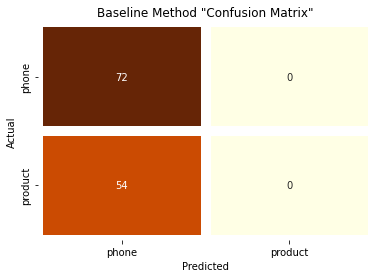

Baseline method probabilities:
Probability correct prediction for "phone" sense = 0.571
Probability correct prediction for "product" sense = 0.000
Average probabiliity of correct prediction for both senses = 0.286




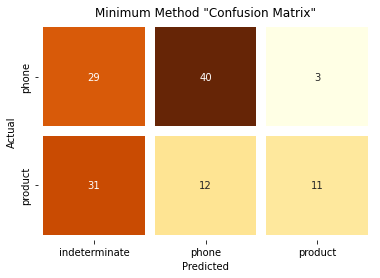

Minimum method probabilities:
Probability correct prediction for "phone" sense = 0.556
Probability correct prediction for "product" sense = 0.204
Average probabiliity of correct prediction for both senses = 0.380




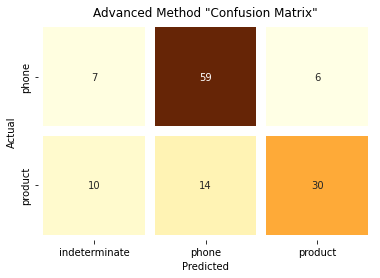

Advanced method probabilities:
Probability correct prediction for "phone" sense = 0.819
Probability correct prediction for "product" sense = 0.556
Average probabiliity of correct prediction for both senses = 0.688




Dropdown(description='Choose Sentences to See:', layout=Layout(width='550px'), options=('Determined sense "Pho…

Output(layout=Layout(border='1px solid black'))

In [72]:
# create a class for changing print formatting
class colors:
    purple = '\033[95m'
    blue = '\033[94m'
    green = '\033[92m'
    gold = '\033[93m'
    red = '\033[91m'
    normal = '\033[0m'
    bold = '\033[1m'
    underline = '\033[4m'

# display the baseline results in a pleasing manner
sn.heatmap(baseline_confusion_matrix, cmap='YlOrBr', annot=True, fmt='g', cbar=False, linewidths=10)
plt.title('Baseline Method "Confusion Matrix"')
plt.show()

print(colors.underline + 'Baseline method probabilities:' + colors.normal)
print(f'Probability correct prediction for "phone" sense = {prob_correct_phone_baseline:.3f}')
print(f'Probability correct prediction for "product" sense = {prob_correct_prod_baseline:.3f}')
print(f'Average probabiliity of correct prediction for both senses = {average_correct_prob_baseline:.3f}')
print()
print()

# display the minimum method determined results in a pleasing manner
sn.heatmap(min_meth_determined_confusion_matrix, cmap='YlOrBr', annot=True, fmt='g', cbar=False, linewidths=10)
plt.title('Minimum Method "Confusion Matrix"')
plt.show()

print(colors.underline + 'Minimum method probabilities:' + colors.normal)
print(f'Probability correct prediction for "phone" sense = {prob_correct_phone_min_meth_determined:.3f}')
print(f'Probability correct prediction for "product" sense = {prob_correct_prod_min_meth_determined:.3f}')
print(f'Average probabiliity of correct prediction for both senses = {average_correct_prob_min_meth_determined:.3f}')
print()
print()

# display the advanced method determined results in a pleasing manner
sn.heatmap(determined_confusion_matrix, cmap='YlOrBr', annot=True, fmt='g', cbar=False, linewidths=10)
plt.title('Advanced Method "Confusion Matrix"')
plt.show()

print(colors.underline + 'Advanced method probabilities:' + colors.normal)
print(f'Probability correct prediction for "phone" sense = {prob_correct_phone_determined:.3f}')
print(f'Probability correct prediction for "product" sense = {prob_correct_prod_determined:.3f}')
print(f'Average probabiliity of correct prediction for both senses = {average_correct_prob_determined:.3f}')
print()
print()

# show sentences from a quadrant of the users choosing
quadrants = ['Determined sense "Phone"/Actual sense "Phone"',
             'Determined sense "Phone"/Actual sense "Product"',
             'Determined sense "Product"/Actual sense "Product"',
             'Determined sense "Product"/Actual sense "Phone"',
             'Determined sense "Indeterminate"/Actual sense "Phone"', 
             'Determined sense "Indeterminate"/Actual sense "Product"']

quadrant_selected = widgets.Dropdown(
    options=quadrants,
    value='Determined sense "Phone"/Actual sense "Phone"',
    description='Choose Sentences to See:',
    disabled=False,
    style={'description_width':'initial'},
    layout={'width':'550px'}
)

def show_sentences(b):
    if quadrant_selected.value == 'Determined sense "Phone"/Actual sense "Phone"':
        output_sents = answer_data_df['sentence'][(answer_data_df['answer_sense']=='phone')
                                                     & (answer_data_df['determined_sense']=='phone')].tolist()
    elif quadrant_selected.value == 'Determined sense "Phone"/Actual sense "Product"':
        output_sents = answer_data_df['sentence'][(answer_data_df['answer_sense']=='product')
                                                     & (answer_data_df['determined_sense']=='phone')].tolist()
    elif quadrant_selected.value == 'Determined sense "Product"/Actual sense "Product"':
        output_sents = answer_data_df['sentence'][(answer_data_df['answer_sense']=='product')
                                                     & (answer_data_df['determined_sense']=='product')].tolist()
    elif quadrant_selected.value == 'Determined sense "Product"/Actual sense "Phone"':
        output_sents = answer_data_df['sentence'][(answer_data_df['answer_sense']=='phone')
                                                     & (answer_data_df['determined_sense']=='product')].tolist()   
    elif quadrant_selected.value == 'Determined sense "Indeterminate"/Actual sense "Phone"':
        output_sents = answer_data_df['sentence'][(answer_data_df['answer_sense']=='phone')
                                                     & (answer_data_df['determined_sense']=='indeterminate')].tolist()  
    elif quadrant_selected.value == 'Determined sense "Indeterminate"/Actual sense "Product"':
        output_sents = answer_data_df['sentence'][(answer_data_df['answer_sense']=='product')
                                                     & (answer_data_df['determined_sense']=='indeterminate')].tolist()      
    else:
        output_sents=['']
    
    with out:
        clear_output()
        for i in range(0,len(output_sents)):
            print(output_sents[i])
            print()
            
#display the sentences   
out = widgets.Output(layout={'border': '1px solid black'})
display(quadrant_selected, out)
with out:
    show_sentences(quadrant_selected.value)
    
# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html
quadrant_selected.observe(show_sentences)

# Analysis
The results for this method are not as good as we expected. The are a few likely causes:
* The use of such a small window or words around the the ambigous word - casually reading the test sentences it's clear that there are words outside the analysis window that would have been useful for determining the sense. For example, telephone appears in many "phone sense" sentences outside of our window. We would also have used more bigrams than just w-2,w-1 if the window was bigger.
* The project had limited training data - the bigrams were not very useful and there were many single occurances for the unigrams. A greater number of training sentences would have yielded better representation of the important words for determining the sense of the ambiguous word. 

We were encouraged by the increase in sense determination when we included the w-2 and w-1 unigrams in the analysis. If we were building a system for a real-world application we would have increased the system's performance by expanding the window for unigrams and bigrams, and gathered more labelled training data.